In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate
from numpy.linalg import solve
from scipy.integrate import quad
import math

In [2]:
shape_pts = np.array([[-8,1],[-6,10],[-5,-7],[0,-5],[1,9],[2,-8],[3,28],[5,-23],[7,12],[9,1],[10,10],[12,15],[14,18],[15,10]])

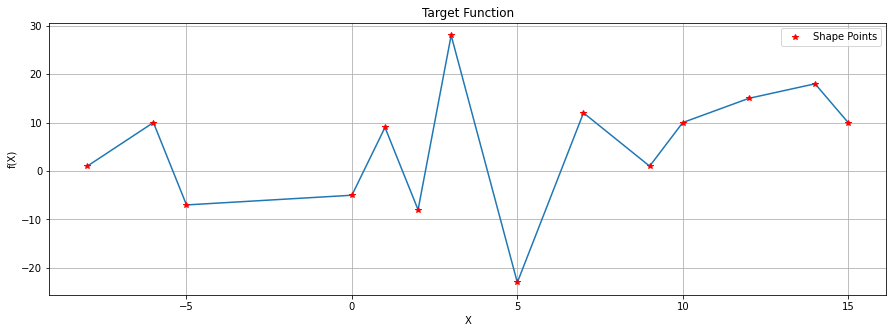

In [5]:
'''Generate the target function f'''

%matplotlib inline
def TargetFunction(lst):
    x = []
    y = []
    for i in range(len(lst)):
        x.append(lst[i][0])
        y.append(lst[i][1])
    f = plt.figure()
    f.set_figwidth(15)
    f.set_figheight(5)
    plt.plot(x,y)
    plt.plot(x,y,'r*', label = 'Shape Points')
    plt.legend(['Shape Points'])
    plt.xlabel('X')
    plt.ylabel('f(X)')
    plt.title('Target Function')
    plt.grid()
    plt.legend(loc ="upper right")
    return plt


f = TargetFunction(shape_pts)
